In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import psycopg2

In [3]:
# Create Connection
conn = psycopg2.connect(database="postgres", user="postgres", password="admin", host="127.0.0.1", port="5432")
print("Database opened successfully")

Database opened successfully


In [4]:
# Create a cursor object
cur = conn.cursor()

In [5]:
# A sample query of all data from the "homeless_edu" table in the "posgres" database 
cur.execute("""SELECT * FROM homeless_edu""")
homeless_edu = cur.fetchall()
print(homeless_edu)

[('2007_AL             ', 7069040, 7196459, 216941, 742919, '2007', 'AL', 8075, 3822, 11897), ('2007_AK             ', 1800616, 1938755, 42049, 131029, '2007', 'AK', 2995, 567, 3562), ('2007_AZ             ', 8724434, 8709531, 316376, 1087447, '2007', 'AZ', 17886, 14210, 32096), ('2007_AR             ', 4415981, 4779308, 138921, 479016, '2007', 'AR', 4979, 3545, 8524), ('2007_CA             ', 72516936, 73225422, 2011865, 6343471, '2007', 'CA', 102972, 215341, 318313), ('2007_CO             ', 7689014, 8039146, 236141, 801867, '2007', 'CO', 14346, 16154, 30500), ('2007_CT             ', 8913149, 8685421, 176592, 570626, '2007', 'CT', 7938, 2049, 9987), ('2007_DE             ', 1694929, 1705204, 37555, 122574, '2007', 'DE', 1784, 488, 2272), ('2007_DC             ', 1148358, 1140506, 20242, 78422, '2007', 'DC', 11399, 1001, 12400), ('2007_FL             ', 28898362, 29849892, 810952, 2666811, '2007', 'FL', 42900, 60701, 103601), ('2007_GA             ', 17755989, 17389530, 471012, 16495

In [3]:
# Create DataFrame
df = pd.DataFrame(homeless_edu, columns=["State_Year", 'TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G', "Homeless_Count"])

#drop columns
df = df.drop(columns=['State'])
df.head()

,Year,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Homeless_Count
0,2007,1800616,1938755,1679,9625,9420,9953,10092,77676,42049,131029,7124
1,2007,7069040,7196459,3592,55972,57795,58792,46200,466414,216941,742919,23794
2,2007,4415981,4779308,12795,38192,35710,35944,30708,288518,138921,479016,17048
3,2007,8724434,8709531,15854,86742,82876,81196,76275,668290,316376,1087447,64192
4,2007,72516936,73225422,68002,454743,467305,490054,468281,3801685,2011865,6343471,636626


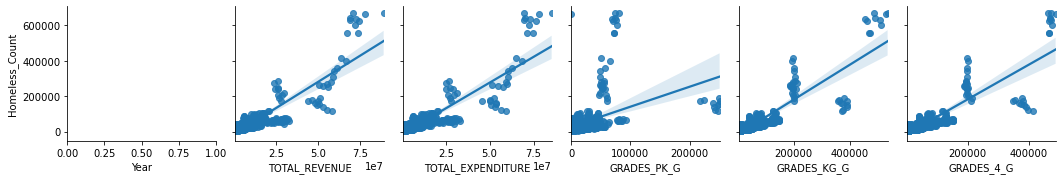

In [4]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['Year','TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G'],y_vars='Homeless_Count',kind='reg')

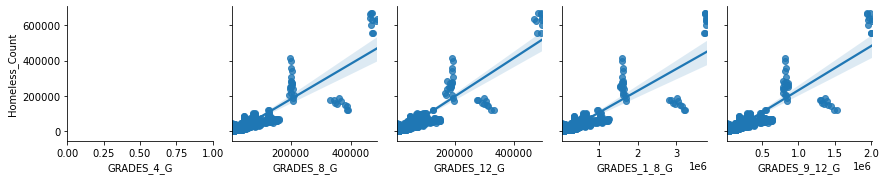

In [5]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G'],y_vars='Homeless_Count',kind='reg')

In [6]:
#create features 
X = df.drop(columns=['Homeless_Count','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G'])
y = df['Homeless_Count']

In [7]:
#split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
#create encoder instance
scaler = StandardScaler()

In [9]:
#fit the scaler
X_scaler = scaler.fit(X_train)

In [10]:
#transform data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
#instantiate model
model = linear_model.LinearRegression()

In [12]:
#fit model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [13]:
#generate predictions
y_pred = model.predict(X_test_scaled)

In [14]:
print(y_pred)

[ 1.30936671e+03  3.93129838e+04 -3.30450456e+02  3.31684052e+04
  3.98622063e+05  5.47202335e+04  5.26158771e+03 -7.26971382e+03
  1.47743343e+05  2.92801544e+05  3.14709959e+04  1.72046812e+04
  7.28046068e+04  5.65920911e+04  3.25531277e+04  2.52651842e+04
  6.67585386e+04 -5.23303712e+03  1.33614255e+04 -6.68562540e+03
  3.89606575e+05  1.55137535e+04  2.69057338e+05  3.79413860e+04
  3.44281993e+04 -4.89266748e+01  5.46815032e+04  4.97272597e+03
  3.03042824e+05  1.38912970e+05  1.47941959e+04  1.45274036e+05
  2.18958008e+04  3.87113929e+04  8.89149331e+04 -9.09979556e+03
  8.78559533e+04  4.19072625e+04 -6.16294514e+03  5.59225538e+04
 -3.19771325e+03  7.06660911e+04 -8.30760461e+03  7.39980073e+04
 -1.04906897e+04  7.55810606e+04  3.47624448e+04  6.88679073e+04
  2.62764491e+04  4.62975147e+04  9.54442378e+03  7.55136699e+04
  1.48620410e+04  2.08085350e+04  3.10551204e+04  1.78887657e+04
  2.16810519e+04 -8.08090902e+03  4.50315392e+04  1.85512782e+04
  4.46858981e+04  7.51720

In [15]:
#get r2 value to determine if model is good fit
metrics.r2_score(y_test, y_pred)

0.7896832160489432

In [16]:
#print result of MAE (mean absolute error)
print(metrics.mean_absolute_error(y_test,y_pred))

30281.50417077976


In [17]:
#print result of MSE (mean squared error)
print(metrics.mean_squared_error(y_test,y_pred))

3085178327.8367214


In [18]:
#print result of RMSE (root mean squared error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

55544.38160459365
